In [12]:
!pip install transformers torch torchvision datasets opencv-python albumentations evaluate scikit-learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score, recall_score

from CRNNmodel import CRNN
from TagDataset import TagDataset
from torch.utils.data import  DataLoader
from train import train_model, eval_model, predict_one_model

device = 'cpu'#'mps' if torch.backends.mps.is_available() else 'cpu'

In [2]:
# Загружаем данные
train_dataset = TagDataset(root_dir='ocr_data/train.csv', images_dir = 'ocr_data/imgs/')
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TagDataset(root_dir='ocr_data/val.csv', images_dir = 'ocr_data/imgs/')
val_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)

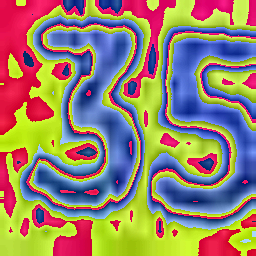

In [26]:
from torchvision import transforms as T
T.ToPILImage()(next(iter(train_loader))[0][0])

In [16]:
# Инициализация и обучение модели
print(f"DEVICE is {device}")
model = CRNN(num_classes=11, pretrained = True,freeze_grads = True).to(device)
train_model(model, train_loader, num_epochs = 15, device = device, PATH_TO_SAVE = 'checkpoints/CRNN_pretrained.pth')

DEVICE is cpu


/opt/anaconda3/envs/millionagentsenv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:35<00:00,  2.76s/it]


Epoch [1/15], Loss: 1.6432


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:37<00:00,  2.79s/it]


Epoch [2/15], Loss: 0.7069


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:38<00:00,  2.80s/it]


Epoch [3/15], Loss: 0.3170


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:38<00:00,  2.80s/it]


Epoch [4/15], Loss: 0.1507


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:36<00:00,  2.77s/it]


Epoch [5/15], Loss: 0.1007


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:38<00:00,  2.80s/it]


Epoch [6/15], Loss: 0.0686


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:36<00:00,  2.78s/it]


Epoch [7/15], Loss: 0.0487


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:37<00:00,  2.79s/it]


Epoch [8/15], Loss: 0.0411


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:36<00:00,  2.78s/it]


Epoch [9/15], Loss: 0.0439


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:39<00:00,  2.81s/it]


Epoch [10/15], Loss: 0.0253


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:37<00:00,  2.79s/it]


Epoch [11/15], Loss: 0.0239


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:37<00:00,  2.78s/it]


Epoch [12/15], Loss: 0.0191


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:37<00:00,  2.79s/it]


Epoch [13/15], Loss: 0.0214


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:38<00:00,  2.80s/it]


Epoch [14/15], Loss: 0.0218


100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:37<00:00,  2.78s/it]

Epoch [15/15], Loss: 0.0347


In [17]:
import torch
#model = torch.load('checkpoints/CRNN_1.pth',weights_only=False)
results_test = eval_model(model, val_loader, device = device)

100%|██████████████████████████████████████████████████████████████████████| 78/78 [03:21<00:00,  2.59s/it]


In [22]:
df = pd.read_csv('ocr_data/test.csv')
df['image_path'] = 'ocr_data/imgs/'+df['img_name']

In [23]:
#model = torch.load('checkpoints/CRNN_1.pth',weights_only=False)
#model.eval()
df['predict'] = df.apply(lambda x: predict_one_model(model, x.image_path,device), axis=1)

In [24]:
print(f"accuracy = {accuracy_score(results_test['actual'], results_test['prediction'])}")
print(f"precision_macrio = {precision_score(results_test['actual'], results_test['prediction'], average = 'macro')}")
print(f"recall_macro{recall_score(results_test['actual'], results_test['prediction'], average = 'macro')}")

accuracy = 0.9317447495961227
precision_macrio = 0.7600464225759836
recall_macro0.7936369474970003


/opt/anaconda3/envs/millionagentsenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/millionagentsenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


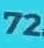

In [9]:
from PIL import Image
img = Image.open(df.image_path[0])
img

In [25]:
results_test

,actual,prediction
0,109,109
1,64,64
2,101,101
3,229,229
4,39,39
...,...,...
4947,71,71
4948,83,83
4949,149,149
4950,74,74


In [ ]:
git remote add origin https://github.com/eingur/eingur.git push -u origin main